# El tratamiento de las variables categóricas

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [4]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [5]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
df_new = df_new[column_names].join(dummy_city_tier)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
# Columnas que actuarán de variables predictoras
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'Gender_Female', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3', 'Record']

In [12]:
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Male',
 'Gender_Female',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Record']

In [13]:
# Conjunto de datos con los cuales se creará el modelo
X = df_new[feature_cols]
# La predicción Y
Y = df_new['Total Spend']

In [14]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01  1.31025013e+02 -1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [16]:
# Se juntan las features con sus respectivos coeficientes
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.1549461254958959),
 ('Gender_Male', 131.02501325554627),
 ('Gender_Female', -131.02501325554616),
 ('City_Tier 1', 76.76432601049508),
 ('City_Tier 2', 55.138974309232616),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.233445744565)]

In [17]:
# Valor de R^2
lm.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 + 'Gender_Male' * 131.02501325554627 + 'Gender_Female' * -131.02501325554616 + 'City_Tier 1' * 76.76432601049508 + 'City_Tier 2' * 55.138974309232616 + 'City_Tier 3' * -131.90330031972772 + 'Record' * 772.233445744565
* Si es hombre y vive en CT1:
    Total_Spend = 128.37220896466772 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 + 'Record' * 772.233445744565
* Si es hombre y vive en CT2:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 + 131.02501325554627 + 55.138974309232616 + 'Record' * 772.233445744565
* Si es hombre y vive en CT3:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 + 131.02501325554627 - 131.90330031972772 + 'Record' * 772.233445744565
* Si es mujer y vive en CT1:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 - 131.02501325554616 + 76.76432601049508 + 'Record' * 772.233445744565
* Si es mujer y vive en CT2:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 - 131.02501325554616 + 55.138974309232616 + 'Record' * 772.233445744565
* Si es mujer y vive en CT3:
    Total_Spend = -79.41713030137362 + 'Monthy Income' * 0.14753898049205735 + 'Transaction Time' * 0.1549461254958959 - 131.02501325554616 - 131.90330031972772 + 'Record' * 772.233445744565

In [18]:
-79.41713030137362 + 131.02501325554627 + 76.76432601049508

128.37220896466772

In [19]:
df_new['prediction'] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205735 + df_new['Transaction Time'] * 0.1549461254958959 + df_new['Gender_Male'] * 131.02501325554627 + df_new['Gender_Female'] * (-131.02501325554616) + df_new['City_Tier 1'] * 76.76432601049508 + df_new['City_Tier 2'] * 55.138974309232616 + df_new['City_Tier 3'] * (-131.90330031972772) + df_new['Record'] * 772.233445744565

In [20]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [21]:
# Suma de los cuadrados de los erroes
SSD = np.sum((df_new['prediction'] - df_new['Total Spend'])**2)
SSD

1517733985.3408165

In [22]:
# Desviación típica de los residuos
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818166

In [23]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976715

In [24]:
error = RSE/sales_mean
error

0.1303113568029416

### Una forma más simple de calcular las predicciones

Otra posible forma de hacer el cálculo de las predicciones podría ser en usando la función predict del modelo lineal y añadiendolo como columna adicional al data frame:

In [25]:
lm.predict(pd.DataFrame(df_new[feature_cols]))

array([4903.69671986, 4799.4348257 , 5157.08250392, ..., 9050.6903581 ,
       8220.59609399, 6814.31308959])

## Eliminar variables dummy redundantes

El hecho de tener n categorías se convierte en n - 1 variables dummy porque la última se puede inferir.

In [27]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:, 1:]

In [28]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [31]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]

In [32]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [37]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


Ahora tenemos menos variables dummy, pero el proceso de convertir las variables categóricas a dummy es el mismo, lo que hacemos es enmascarar las variables.

In [43]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression().fit(X,Y)

In [44]:
lm.intercept_

-133.67781754642238

In [45]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

Como vemos, el modelo sigue siendo el mismo, pero ahora existen menos variables.

In [47]:
# Valor de R^2
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* [('Monthly Income', 0.14753898049205735),
* ('Transaction Time', 0.1549461254958959),
* ('Gender_Male', 131.02501325554627),
* ('Gender_Female', -131.02501325554616),
* ('City_Tier 1', 76.76432601049508),
* ('City_Tier 2', 55.138974309232616),
* ('City_Tier 3', -131.90330031972772),
* ('Record', 772.233445744565)]
 
Coeficientes tras enmascarar las variables dummy pertinente
* [('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.1549461254959002),
* ('Gender_Male', 262.0500265110948),
* ('City_Tier 2', -21.62535170126276),
* ('City_Tier 3', -208.66762633022296),
* ('Record', 772.2334457445636)]

Los cambios se reflejan en
* Gender_Male
* Gender_Female
* City_Tier 1
* City_Tier 2
* City_Tier 3

## Transformación de variables para conseguir una relación no lineal

El segundo problema más típico al realizar una regresión lineal: el valor de salida, es decir, la variable a predecir no necesariamente tiene una relación directamete lineal con alguna de las variables predictoras. Pueden existir relaciones no lineales.  

En estos casos conviene transformar la variable para ajustar a lo que queremos.

Lo más recomendable para tener una idea si la relación es o no lineal es empezar por hacer un plot de la variable de salida con todas y cada una de las variables predictoras.

Esto se puede conseguir con una matriz de scatter plot, muy similar a la matriz de correlación.

In [52]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')

In [62]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [60]:
data_auto.shape

(406, 9)

In [63]:
import matplotlib.pyplot as plt

Text(0.5,1,'Caballos de potencia vs Consumo millas por galón')

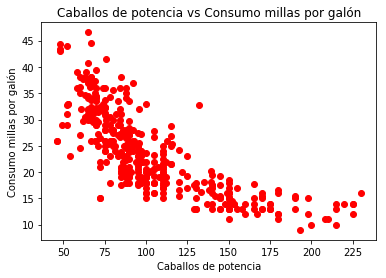

In [67]:
%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo millas por galón')
plt.title('Caballos de potencia vs Consumo millas por galón')

La relación parece estar un poco curvea, por lo que no es lineal.

Sin embargo, vamos a optar por intentar ajustarlo a un modelo que sea lineal, ver qué tal se comporta y si vemos que la cosa no tira se opta por un modelo cuadrático, exponencial, cúbico o algún otro.  

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [77]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = X[:, np.newaxis]

In [72]:
# La función espera un dataframe, no un vector, por lo tanto creamos una nueva dimensión de X
lm = LinearRegression().fit(X[:, np.newaxis],Y)

In [73]:
type(X)

pandas.core.series.Series

In [80]:
type(X_data)

numpy.ndarray

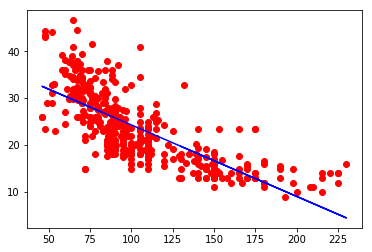

In [79]:
%matplotlib inline
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X_data), color='blue')

In [78]:
# R^2
lm.score(X_data, Y)

0.5746533406450252

In [86]:
# Suma de los cuadrados de las desviaciones
SSD = np.sum((Y - lm.predict(X_data))**2)
# Desviación típica de los residuos
RSE = np.sqrt(SSD/(len(X_data)-1))
# Media de Y
y_mean = np.mean(Y)
# Error
error = RSE/y_mean

SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

### Modelo de regresión cuadrático
* mpg = a + b horsepower ^ 2

La única modificación es que en vez de tomar como variable X ahora se toma como variable X^2

In [88]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [89]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
lm.score(X_data, Y)

0.4849887034823205

In [91]:
# Suma de los cuadrados de las desviaciones
SSD = np.sum((Y - lm.predict(X_data))**2)
# Desviación típica de los residuos
RSE = np.sqrt(SSD/(len(X_data)-1))
# Media de Y
y_mean = np.mean(Y)
# Error
error = RSE/y_mean

SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)